In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from scipy.spatial.transform import Rotation

import utils
from importlib import reload

sns.set_theme(palette=sns.color_palette("twilight_shifted"))

In [2]:
k = np.array([[1000, 0, 300], [0, 1000, 200], [0, 0, 1]])

r1 = np.identity(3)
t1 = np.array([0, 0, 0]).reshape((-1, 1))

r2 = Rotation.from_euler("xyz", [0.7, -0.5, 0.8]).as_matrix()
t2 = np.array([0.2, 2, 1]).reshape((-1, 1))

## Exercise 3.1
### Project points

In [3]:
reload(utils)
Q = np.array([1, 0.5, 4]).reshape(-1, 1)
q1 = utils.projectpoints(k, r1, t1, Q)
q2 = utils.projectpoints(k, r2, t2, Q)

qs = np.append(q1, q2, axis=1)
utils.hom_to_inhom(qs)

array([[550.        , 582.47256835],
       [325.        , 185.98985776]])

## Exercise 3.2
### Cross op product

In [4]:
vecs = np.random.randn(3, 2)
vec1, vec2 = vecs[:, 0], vecs[:, 1]

In [5]:
reload(utils)
px = utils.cross_op(vec1)
c1, c2 = px @ vec2, np.cross(vec1, vec2)
c1, c2, np.allclose(c1, c2)

(array([ 0.92086448, -0.48122059, -1.13645882]),
 array([ 0.92086448, -0.48122059, -1.13645882]),
 True)

## Exercise 3.3
### Fundemental matrix F

In [6]:
reload(utils)
E, F = utils.generate_fundemental_matrix(k, k, r2, t2)
F

array([[ 3.29311881e-07,  8.19396327e-07,  1.79162592e-03],
       [ 5.15532551e-07, -8.76915984e-07,  9.31426656e-05],
       [-1.29882755e-03,  1.51951700e-03, -1.10072682e+00]])

## Exercise 3.4
### Epipolar line of l in Q

In [7]:
np.set_printoptions(suppress=True)
F @ q1

array([[ 0.00895621],
       [ 0.00036675],
       [-5.28495581]])

## Exercise 3.5
### Is q2 located on the epipolar line from q1

In [8]:
val = q2.T @ F @ q1
print("q2 located on epipolar line from q1: ", np.allclose(val, 0))

q2 located on epipolar line from q1:  True


## Exercise 3.8
### Load image

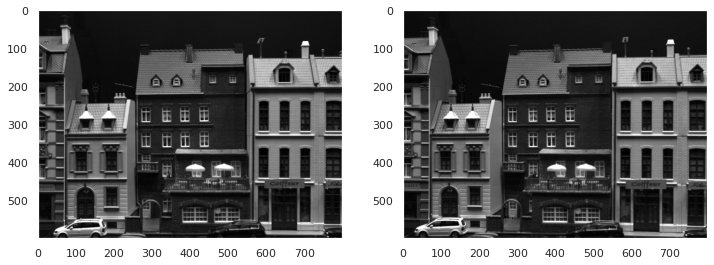

In [9]:
obj = np.load('../data/TwoImageData.npy', allow_pickle=True).item()
im1, im2, r1, r2, t1, t2, k = obj.values()
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(im1, cmap="gray")
ax1.grid(False)
ax2.imshow(im2, cmap="gray")
ax2.grid(False)

In [10]:
E, F = utils.generate_fundemental_matrix(k, k, r2, t2)
F

array([[ 0.        , -0.        ,  0.00000012],
       [-0.        , -0.        ,  0.00003287],
       [ 0.00000042, -0.00003217, -0.000212  ]])

In [11]:
mlp.use('tkAgg')
import time

In [12]:
def draw_line(l, shape, ax):
#Checks where the line intersects the four sides of the image
# and finds the two intersections that are within the frame
    def in_frame(l_im):
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
            return q
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    ax.plot(*np.array(P).T)

In [13]:
# fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
# ax1.grid(False)
# ax2.grid(False)
# ax1.imshow(im1, cmap="gray")
# ax2.imshow(im2, cmap="gray")

# while True:
#     plt.waitforbuttonpress()
#     p1 = np.append(np.array(plt.ginput()), 1)
#     l = F @ p1
#     draw_line(l, im2.shape, ax2)
# plt.close()

In [14]:
im2.shape

(600, 800)

## **Triangulation**

In [92]:
point = np.array([[1, .5, 4]]).T
q1 = utils.projectpoints(k, r1, t1, point)
q2 = utils.projectpoints(k, r2, t2, point)

q1 = utils.hom_to_inhom(q1)
q2 = utils.hom_to_inhom(q2);

In [93]:
p1 = utils.make_projection_matrix(k, r1, t1)
p2 = utils.make_projection_matrix(k, r2, t2)

In [104]:
reload(utils)
qs = np.vstack([q1, q2])
ps = np.vstack([p1, p2])
testh = utils.triangulate(qs, ps)
testi = utils.hom_to_inhom(testh)
print(testi, point)


[1.  0.5 4. ] [[1. ]
 [0.5]
 [4. ]]
